In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [17]:
data = pd.read_csv("/kaggle/input/upi-transactions-dataset/MyTransaction.csv")

In [18]:
data.head(2)

,Date,Category,RefNo,Date.1,Withdrawal,Deposit,Balance
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2023,Rent,3.00E+11,1/1/2023,3950.0,0.0,1837.23


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1469 non-null   object 
 1   Category    1469 non-null   object 
 2   RefNo       1469 non-null   object 
 3   Date.1      1469 non-null   object 
 4   Withdrawal  1469 non-null   float64
 5   Deposit     1469 non-null   float64
 6   Balance     1469 non-null   float64
dtypes: float64(3), object(4)
memory usage: 80.5+ KB


In [20]:
data.isnull().sum()

Date          1
Category      1
RefNo         1
Date.1        1
Withdrawal    1
Deposit       1
Balance       1
dtype: int64

In [21]:
data.dtypes

Date           object
Category       object
RefNo          object
Date.1         object
Withdrawal    float64
Deposit       float64
Balance       float64
dtype: object

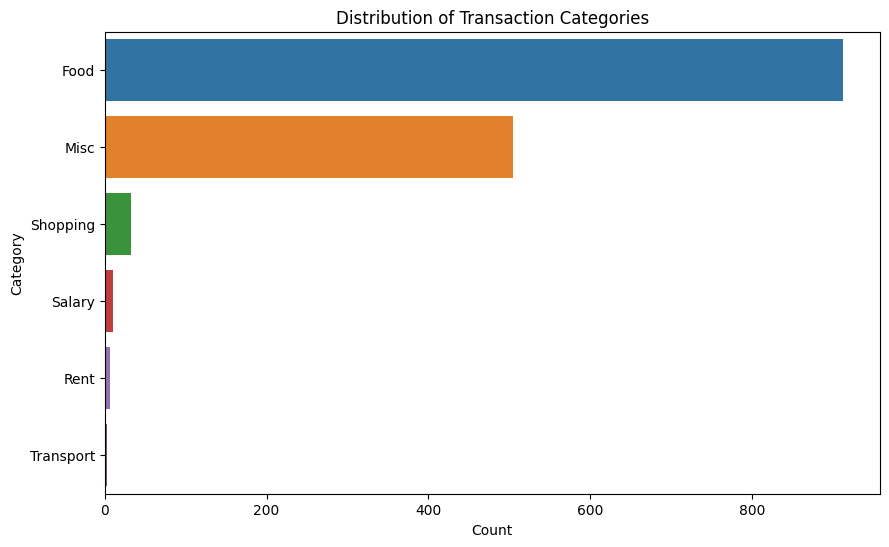

In [22]:
# Distribution of transaction categories
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=data, order=data['Category'].value_counts().index)
plt.title('Distribution of Transaction Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

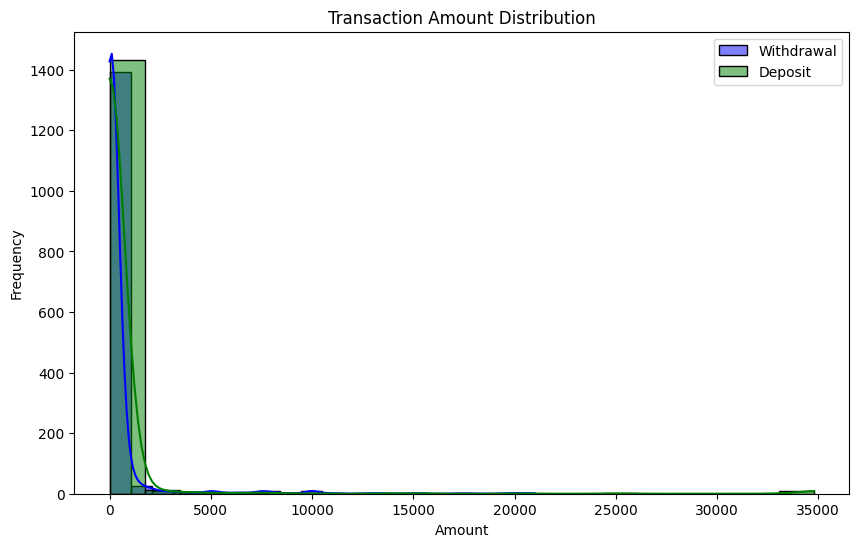

In [23]:
# Transaction amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Withdrawal'], bins=20, kde=True, color='blue', label='Withdrawal')
sns.histplot(data['Deposit'], bins=20, kde=True, color='green', label='Deposit')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

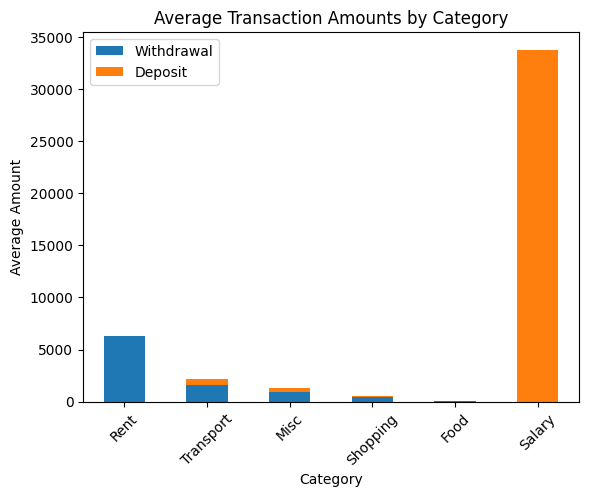

In [26]:
# Average transaction amounts by category
plt.figure(figsize=(10, 6))
avg_amounts = data.groupby('Category')[['Withdrawal', 'Deposit']].mean().sort_values(by='Withdrawal', ascending=False)
avg_amounts.plot(kind='bar', stacked=True)
plt.title('Average Transaction Amounts by Category')
plt.xlabel('Category')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.legend(['Withdrawal', 'Deposit'])
plt.show()

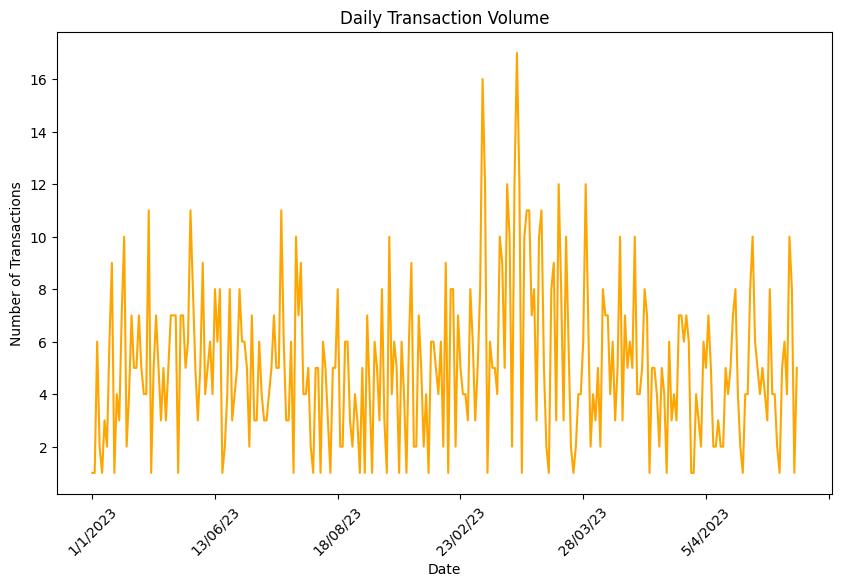

In [27]:
# Daily transaction volume
plt.figure(figsize=(10, 6))
daily_volume = data.groupby('Date').size()
daily_volume.plot(kind='line', color='orange')
plt.title('Daily Transaction Volume')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

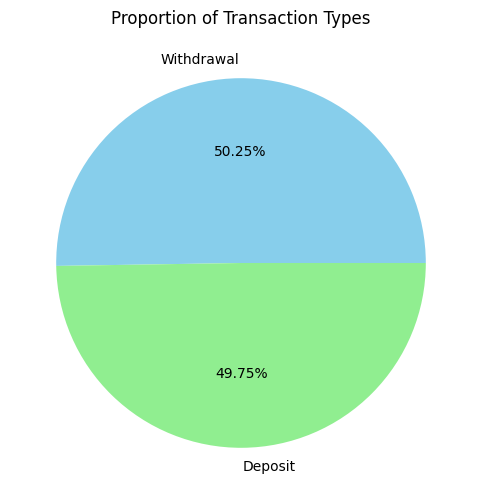

In [31]:
# Proportion of transaction types
transaction_types = data[['Withdrawal', 'Deposit']].sum()
plt.figure(figsize=(8, 6))
plt.pie(transaction_types, labels=transaction_types.index, autopct='%1.2f%%', colors=['skyblue', 'lightgreen'])
plt.title('Proportion of Transaction Types')
plt.show()

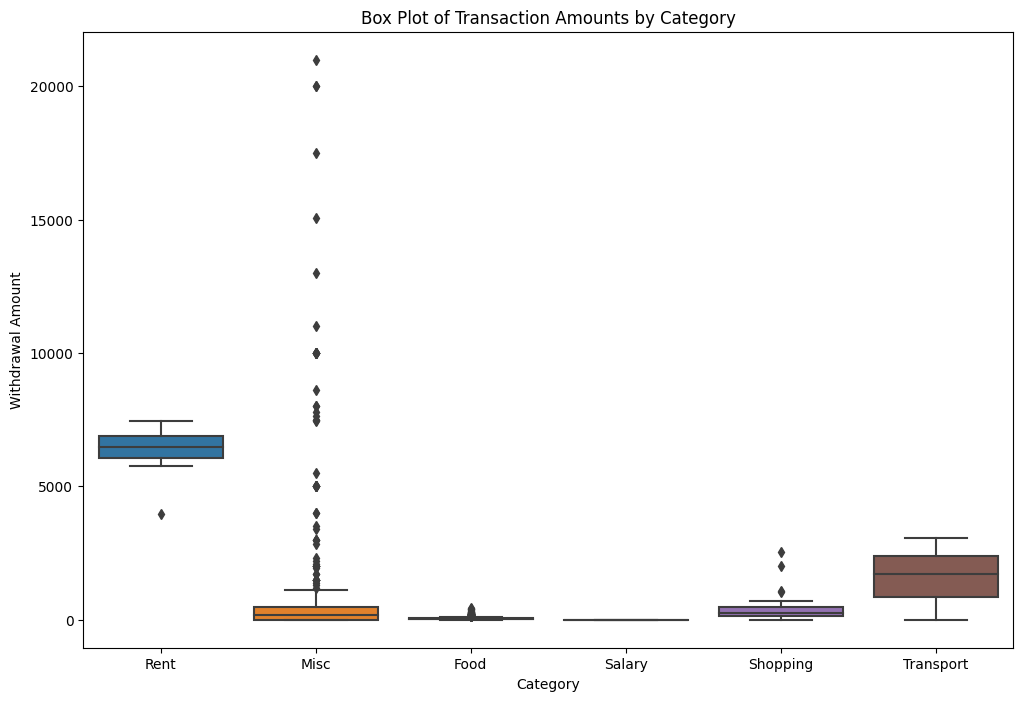

In [35]:
# Box plot of transaction amounts by category
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Withdrawal', data=data)
plt.title('Box Plot of Transaction Amounts by Category')
plt.xlabel('Category')
plt.ylabel('Withdrawal Amount')
plt.show()

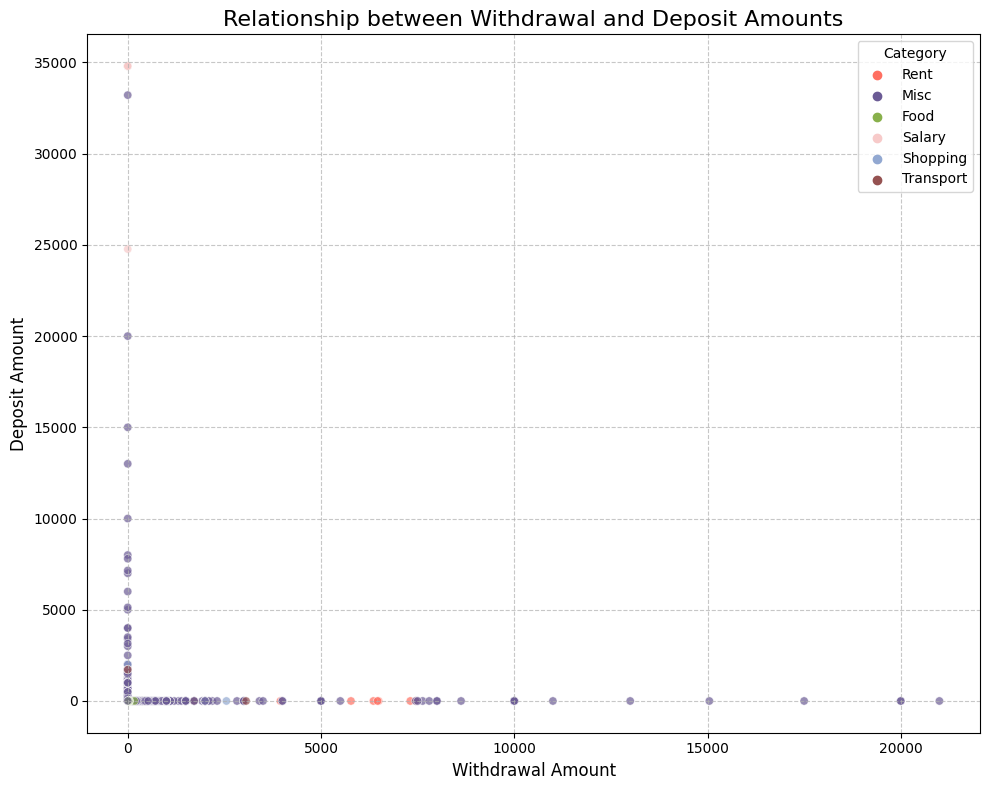

In [40]:
# Relationship between withdrawal and deposit amounts (Scatter Plot)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Withdrawal', y='Deposit', data=data, hue='Category', palette=custom_palette, alpha=0.7)
plt.title('Relationship between Withdrawal and Deposit Amounts', fontsize=16)
plt.xlabel('Withdrawal Amount', fontsize=12)
plt.ylabel('Deposit Amount', fontsize=12)
plt.legend(title='Category')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()